In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sounddevice as sd

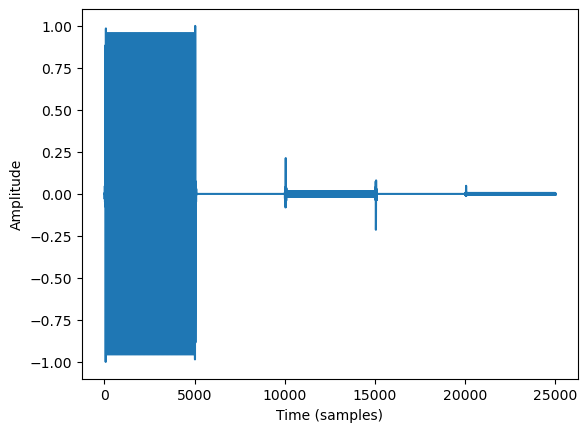

In [3]:
bipsOUT, fs = librosa.load('bipsOUT.wav', sr=None)

plt.plot(bipsOUT)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

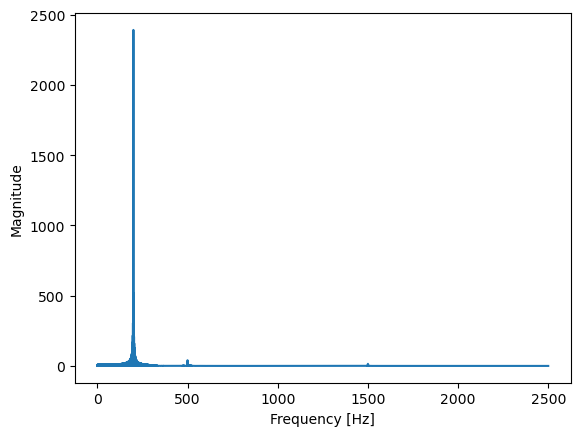

In [4]:
fft_bipsOUT = np.fft.fft(bipsOUT)
frequency = np.fft.fftfreq(len(fft_bipsOUT), 1/fs)
frequency = frequency[:len(frequency)//2]
fft_bipsOUT = fft_bipsOUT[:len(fft_bipsOUT)//2]
plt.plot(frequency, np.abs(fft_bipsOUT))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()